# Camera Calibration

- Unknown : Intrinsic + extrinsic parameters (5* + 6 DoF)
    - The number of intrinsic parameters* can be varied w.r.t. user preference.
- Given : 3D Points $X_1, X_2, \dots, X_n$ and their projected points $x_1, x_2, \dots,x_n$
- Constraints : n x projection $x_i = K[R|t]X_i$
- Solution
    - OpenCV `cv::calibrateCamera()` and `cv::initCameraMatrix2D()`
    - Camera Calibration Toolbox for MATLAB, http://www.vision.caltech.edu/bouguetj/calib_doc/
    - GML C++ Camera Calibration Toolbox, http://graphics.cs.msu.ru/en/node/999
    - DrakCamCalibrator, http://darkpgmr.tistory.com/139


In [1]:
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline

### Why is the checkerboard pattern so widely used in calibration?
Checkerboard patterns are distinct and easy to detect in an image. Not only that, the corners of squares on the checkerboard are ideal for localizing them because they have sharp gradients in two directions. In addition, these corners are also related by the fact that they are at the intersection of checkerboard lines. All these facts are used to robustly locate the corners of the squares in a checkerboard pattern. [learnopencv](https://learnopencv.com/camera-calibration-using-opencv/)


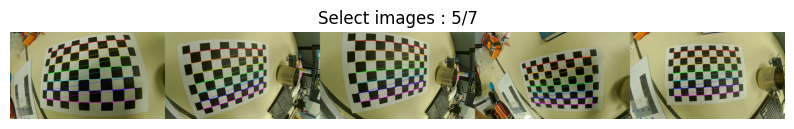

In [2]:
# ChessBoard Setting
board_pattern = (10, 7)

# Open a Video
input = "../bin/data/chessboard.avi"
cap = cv2.VideoCapture(input)
if cap.isOpened() == False: raise Exception("No video")
winname = "3DV Tutorial : Camera Calibration"

# Get some Chessboard images
images = []
displays = []
while True:
    ret, image = cap.read()
    if not ret: break
    
    cv2.imshow(winname, image)
    key = cv2.waitKey(1)
    if key == 27: break # 'ESC' Key : Exit
    elif key == 32: # 'Space' Key : Pause
        ret, pts = cv2.findChessboardCorners(image, board_pattern, None) # No flags
        display = copy.deepcopy(image)
        display = cv2.drawChessboardCorners(display, board_pattern, pts, ret)
        cv2.imshow(winname, display)
        key = cv2.waitKey(0)
        if key == 27: break # 'ESC' Key : Exit
        elif key == 13: # 'Enter' Key : Select image
            images.append(image)
            displays.append(display)
cap.release()
cv2.destroyAllWindows()
if not len(images): raise Exception("No images")

vis_image = np.hstack((displays[:5] if len(displays) > 4 else displays))
plt.figure(figsize=(10, 30))
plt.title("Select images : %d/%d" % (min(len(displays), 5), len(displays)))   
plt.imshow(vis_image[:, :, (2, 1, 0)])
plt.axis('off')
plt.show()

In [3]:
# Find 2D corner Points from given images
img_points = []
for image in images:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape
    ret, corners = cv2.findChessboardCorners(gray, board_pattern) # No flags
    if ret == True:
        img_points.append(corners)

if len(img_points) == 0:
    raise Exception("No 2D corner points")

In [4]:
# Prepare 3D Points of the Chessboard
objp = np.zeros((board_pattern[0]*board_pattern[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:board_pattern[1], 0:board_pattern[0]].T.reshape(-1, 2)
obj_points = [objp for _ in range(len(images))]

In [5]:
# Calibrate Camera
rms, K, dist_coeff, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, (h, w), None, None)

# Report calibration results
print("## Camera Calibration Results")
print(f"* The number of applied images = {w}x{h}")
print(f"* RMS error = {rms}")
print(f"* Camera matrix (K) = \n{K}")
print(f"* Distortion coefficient (k1, k2, p1, p2, k3, ...)\n = {dist_coeff}")

## Camera Calibration Results
* The number of applied images = 960x540
* RMS error = 136.72345297771147
* Camera matrix (K) = 
[[1.18379381e+03 0.00000000e+00 2.04958309e+02]
 [0.00000000e+00 5.28396310e+03 3.83069370e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
* Distortion coefficient (k1, k2, p1, p2, k3, ...)
 = [[-2.49974491 -2.71580482  0.08917231 -0.11178403 21.51265804]]
